Since the link in the assignment was broken, I searched around and found the following link that seems to load the relevant data into networkx: https://networkx.github.io/documentation/networkx-1.10/examples/algorithms/davis_club.html 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import networkx.algorithms.bipartite as bi

In [2]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

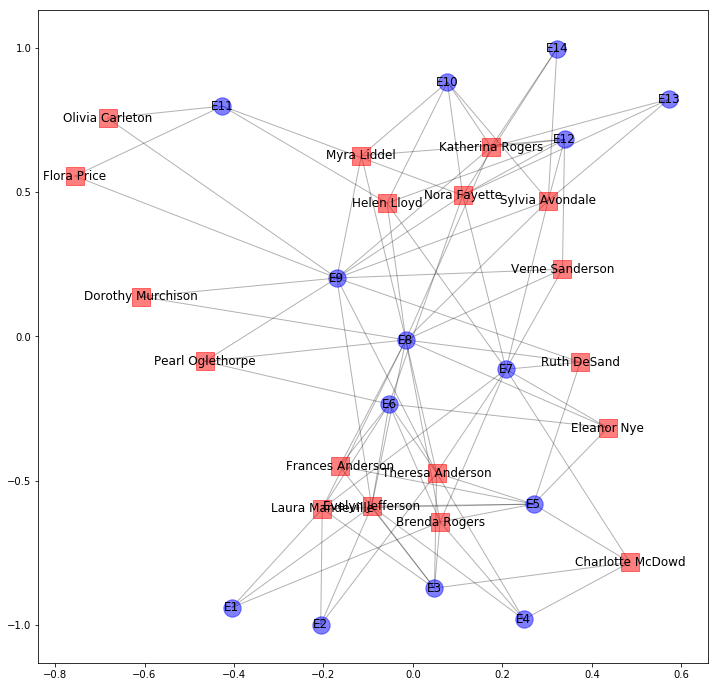

In [3]:
# plot the bipartite graph 
plt.figure(3,figsize=(12,12)) 
pos=nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_nodes(G, pos, node_shape='s', nodelist=women, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_shape='o', nodelist=clubs, node_color='b', alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.show()

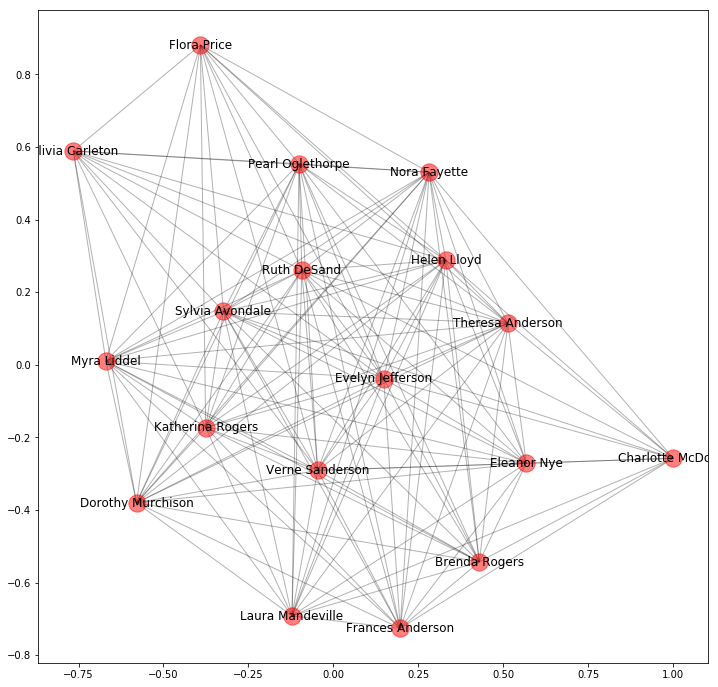

In [4]:
W = bi.projected_graph(G, women)

# plot the projected graph of women 
plt.figure(3,figsize=(12,12)) 
pos=nx.spring_layout(W)
nx.draw_networkx_edges(W, pos, alpha=0.3)
nx.draw_networkx_nodes(W, pos, alpha=0.5)
nx.draw_networkx_labels(W, pos)
plt.show()

Let's define 'Friends' as women who attended the same event. Based on the data from the projected graph, we can see that the number of friends of the women in the network range from 11-17 with Charlotte McDowd having the fewest friends and several women having the most friends. 

In [5]:
# project bipartite graph onto women nodes
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [6]:
# compute centrality measures: degree, closeness, betweenness and eigenvector closeness 
def sorted_map(map):
    ms = sorted(map.items(), key=lambda kv: kv[1], reverse=True)
    return ms

In [7]:
# degree
d = nx.degree(W)
ds = sorted(W.degree, key=lambda x: x[1], reverse=True)
ds_df = pd.DataFrame.from_records(ds[:10], columns=['woman', 'degree'])

In [8]:
# closeness 
c = nx.closeness_centrality(W)
cs = sorted_map(c)
cs_df = pd.DataFrame.from_records(cs[:10], columns=['woman', 'closeness'])

In [9]:
# betweenness 
b = nx.betweenness_centrality(W)
bs = sorted_map(b)
bs_df = pd.DataFrame.from_records(bs[:10], columns=['woman', 'betweenness'])

In [10]:
e = nx.eigenvector_centrality_numpy(W)
ec = sorted_map(e)
ec_df = pd.DataFrame.from_records(ec[:10], columns=['woman', 'eigenvector'])

In [11]:
# print table of users with highest centrality measures 
names1=[x[0] for x in ds[:]]
names2=[x[0] for x in cs[:]]
names3=[x[0] for x in bs[:]]
names4=[x[0] for x in ec[:]]
names=list(set(names1) | set(names2) | set(names3) | set(names4))
table=[[name, d[name], c[name], b[name], e[name]] for name in names]
df = pd.DataFrame(table, columns=['woman','degree','closeness','betweenness','eigenvector'])

# sum ranks to order by centrality - assumes equal weighting 
df['rank'] = df.rank(axis=0, ascending=False).sum(axis=1)
df.sort_values(by=['rank'])

,woman,degree,closeness,betweenness,eigenvector,rank
9,Verne Sanderson,17,1.000000,0.010122,0.253524,17.0
16,Theresa Anderson,17,1.000000,0.010122,0.253524,18.0
11,Sylvia Avondale,17,1.000000,0.010122,0.253524,19.0
15,Ruth DeSand,17,1.000000,0.010122,0.253524,20.0
7,Nora Fayette,17,1.000000,0.010122,0.253524,23.0
5,Helen Lloyd,17,1.000000,0.010122,0.253524,27.0
2,Evelyn Jefferson,17,1.000000,0.010122,0.253524,30.0
13,Pearl Oglethorpe,16,0.944444,0.005348,0.243157,43.0
12,Myra Liddel,16,0.944444,0.005348,0.243157,46.0
10,Katherina Rogers,16,0.944444,0.005348,0.243157,48.0


Not surprisingly, the women ranked highest among the various centrality measures (actually many were tied given the small data set) were also the same women that appear in the middle of the projected graph. 